In [44]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
data = pd.read_csv("Data/Apple")
new = pd.DataFrame(data["Close"].values,columns=["Close_Price"],index=pd.to_datetime(data["Date"]))
new

,Close_Price
Date,
2005-07-28,1.316374
2005-07-29,1.281811
2005-08-01,1.284817
2005-08-02,1.298041
2005-08-03,1.298941
...,...
2025-07-16,210.160004
2025-07-17,210.020004
2025-07-18,211.179993


5.423630930318614e-13


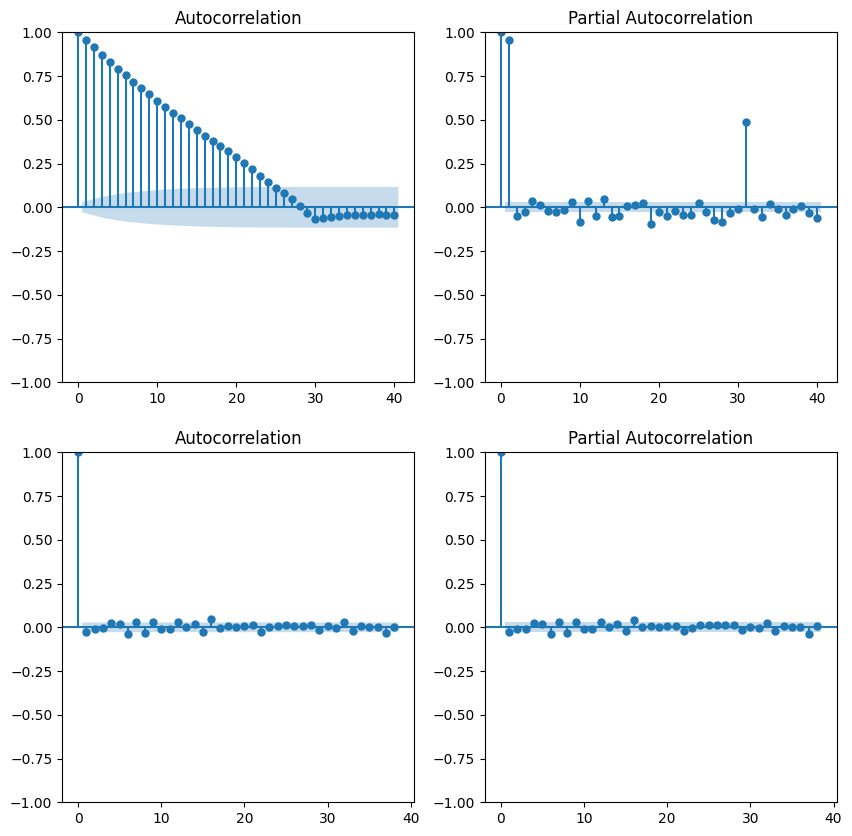

In [52]:
#No stationarity already proved in arima
#non seasonal
log_data = np.log(new["Close_Price"]).diff().dropna().reset_index(drop=False).set_index("Date")
#seasonality
diff_data = new["Close_Price"].diff(30).dropna().reset_index(drop=False).set_index("Date")
test = adfuller(diff_data["Close_Price"])
print(test[1])
fig,ax = plt.subplots(2,2,figsize=(10,10))
plot_acf(diff_data["Close_Price"],ax=ax[0][0],lags=40)
plot_pacf(diff_data["Close_Price"],ax=ax[0][1],lags=40)
plot_acf(log_data["Close_Price"],ax=ax[1][0])
plot_pacf(log_data["Close_Price"],ax=ax[1][1])
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new["Close_Price"],new["Close_Price"],test_size=0.2,shuffle=False)

In [53]:
apple_model = SARIMAX(x_train,order=(1,2,1),seasonal_order=(1,1,2,30))
fit = apple_model.fit()
predict = fit.forecast(30) 
actual = y_test[0:30]
print(predict)
print("mae:",mean_absolute_error(actual,predict))
print("r2:",r2_score(actual,predict))

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
fit.forecast(10)

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5027    214.509985
5028    214.583829
5029    214.591292
5030    214.690834
5031    214.705911
5032    214.845913
5033    215.006538
5034    215.090055
5035    215.221077
5036    215.304765
Name: predicted_mean, dtype: float64